# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3 AC 209 : Regularization


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2pt">

In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

<div class='exercise'> <b> Question 1 [12 pts] </b> </div>

Ridge and LASSO regularizations are powerful tools that not only increase generalization, but also expand the range of problems that we can solve. We will study this statement in this question. 

**1.1** Let $X\in \mathbb{R}^{n\times p}$ be a matrix of observations, where each row corresponds an observation and each column corresponds to a predictor. Now consider the case $p > n$: explain why there is no unique solution to the OLS estimator. 

**1.2**  Now consider the Ridge formulation. Show that finding the ridge estimator is equivalent to solving an OLS problem after adding p dummy observations with their X value equal to $\sqrt{\lambda}$ at the j-th component and zero everywhere else, and their Y value set to zero. In a nutshell, show that the ridge estimator can be found by getting the least squares estimator for the augmented problem:

$$X^* = \begin{bmatrix} X \\ \sqrt{\lambda}I \end{bmatrix}$$

$$Y^* = \begin{bmatrix} Y \\ \textbf{0} \end{bmatrix}$$

**1.3** Can we now solve the $p > n$ situation? Explain why.

**1.4** Take a look at the LASSO estimator expression that we derived when $X^TX=I$. What needs to happen for LASSO to nullify  $\beta_i$?

**1.5**  Can LASSO be used when $p>n$? What important consideration, related to the number of predictors that LASSO chooses, do we have to keep in mind in that case?

**1.6** Ridge and LASSO still have room for improvement. List two limitations of Ridge, and two limitations of LASSO.

**1.7** Review the class slides and answer the following questions: When is Ridge preferred? When is LASSO preferred? When is Elastic Net preferred?

### Answers

**1.1** Let $X\in \mathbb{R}^{n\times p}$ be a matrix of observations, where each row corresponds an observation and each column corresponds to a predictor. Now consider the case $p > n$: explain why there is no unique solution to the OLS estimator. 

*your answer here*

The formula leading to the least squares estimator is simply:

$$X^TX\beta = X^Ty$$

If $p > n$, $X^TX$ is not invertible, thus there is no unique solution to the least squares problem. We can see this with a basic property of the Gram Matrix:

$$Xv = 0 \Leftrightarrow X^TXv=0$$

When $p > n$, the rank of $X$ is at most $n$. This means that there are infinite nonzero $v$ that will satisfy the above equation, and the same thing happens to $X^TX$. This proves that $X^TX$ is non invertible, and we will have infinite solutions to the least squares estimator.

**1.2**  Now consider the Ridge formulation. Show that finding the ridge estimator is equivalent to solving an OLS problem after adding p dummy observations with their X value equal to $\sqrt{\lambda}$ at the j-th component and zero everywhere else, and their Y value set to zero. In a nutshell, show that the ridge estimator can be found by getting the least squares estimator for the augmented problem:

$$X^* = \begin{bmatrix} X \\ \sqrt{\lambda}I \end{bmatrix}$$

$$Y^* = \begin{bmatrix} Y \\ \textbf{0} \end{bmatrix}$$



*your answer here*

The Ridge estimator is X, and this value is found by minimizing: 

$$min_\beta \lVert X\beta - Y\rVert_2^2+\lambda\lVert \beta\rVert^2_2$$

If we develop the norms, we have:

$$min_\beta \left ((\beta_1 x_1 - y_1)^2 +\dots+ (\beta_n x_n - y_n)^2 + \lambda\sum_{i=1}^p\beta_i^2 \right)$$

$$min_\beta \left ((\beta_1 x_1 - y_1)^2 +\dots+ (\beta_n x_n - y_n)^2 + \sum_{i=1}^p(\sqrt{\lambda}\beta_i)^2 \right)$$

$$min_\beta \left( (\beta_1 x_1 - y_1)^2 +\dots+ (\beta_n x_n - y_n)^2 + (\sqrt{\lambda}\beta_1 - 0)^2 +\dots+ (\sqrt{\lambda}\beta_p - 0)^2\right)$$

And this expression could be seen as another norm, with the following form:

$$min_\beta \left\lVert       \begin{pmatrix}
          \begin{bmatrix}
            X\beta\\  
           \sqrt{\lambda}I\beta
          \end{bmatrix} -
          \begin{bmatrix}
           Y \\
           \textbf{0}
         \end{bmatrix}
    \end{pmatrix} \right \rVert^2_2$$
    
$$min_\beta \left\lVert       \begin{pmatrix}
          \begin{bmatrix}
            X\\  
           \sqrt{\lambda}I_p
          \end{bmatrix}\beta -
          \begin{bmatrix}
           Y \\
           \textbf{0}
         \end{bmatrix}
    \end{pmatrix} \right \rVert^2_2$$
    
Developing this norm gives us the same expression as above. Now this expression is basically computing the maximum likelihood estimator with a modified X and Y matrices, $X^*$ and $Y^*$:
$$
X^* = 
          \begin{bmatrix}
            X\\  
           \sqrt{\lambda}I_p
          \end{bmatrix}
$$
          
$$
Y^*=\begin{bmatrix}
           Y \\
           \textbf{0}
         \end{bmatrix}
$$


We have then shown that ridge regression can be seen as extending the X matrix with m rows corresponding to $\sqrt{\lambda}I_p$, and extending Y with corresponding zeros. 

**1.3** Can we now solve the $p > n$ situation? Explain why.

*your answer here*

Solving this minimization problem is now possible since the new matrix $X^* = \begin{bmatrix}
            X\\  
           \sqrt{\lambda}I_p
          \end{bmatrix}$ now has p independent rows, which means that it has at least rank p. The square matrix $X^{*T}X^* \in \mathbb{R}^{p\times p}$ will then necessarily have rank p (full rank). 

**1.4** Take a look at the LASSO estimator expression that we derived when $X^TX=I$. What needs to happen for LASSO to nullify  $\beta_i$?


*your answer here*

From the slides, the LASSO estimator formulation shows that component $\beta_i$ will be nullified if $|x_i^Ty| < \lambda/2$. This means that if column i's correlation with y is lower than half our regularization parameter, we remove that predictor.

**1.5**  Can LASSO be used when $p>n$? What important consideration, related to the number of predictors that LASSO chooses, do we have to keep in mind in that case?

*your answer here*

Lasso can be used in the p > n case, as there is no explicit requiremenet for $X^TX$ to be invertible in its formulation. It is important to keep in mind, however, that LASSO will select at most n predictors (and nullify the rest), so in extreme cases suchas as p >> n, we might need another type of regularization such as Elastic Net. One thing done in practice in these cases to reduce the dimiensionality is to fit a Ridge Regression and remove all coefficients with absolute magnitude greater than a certain threshold.

**1.6** Ridge and LASSO still have room for improvement. List two limitations of Ridge, and two limitations of LASSO.

*your answer here* 

Ridge:
- Does not perform feature selection.
- Lower interpretability
- Sensitive to outliers
- If the problem is intrinsically sparse, Ridge will not regularize as well as expected.

LASSO:
- Can eliminate at most n predictors. 
- When features are highly collinear, LASSO becomes unstable in its choice of features to remove.
- No analytical solution

**1.7** Review the class slides and answer the following questions: When is Ridge preferred? When is LASSO preferred? When is Elastic Net preferred?

*your answer here* 

Ridge is preferred when the problem is known to have strong multicollinearity, but a manageable amount of predictors. Ridge's main strength is pushing the problem towards a well-conditioned state, and increasing generalization by reducing the magnitude of the betas. 

LASSO is preferred over Ridge when we are dealing with an underlying model that is believed to have few nonzero coefficients (sparse solution), because $L_1$  regularization promotes sparsity, while $L_2$ does not. 

Elastic Net is preferred over LASSO in a general sense because it combines the power of both estimators. Keep in mind, however, that EN has 2 hyperparameters that need to be found. It is particularly helpful in situations when the number of features is much greater than the number of samples. EN is also good in cases where there are highly correlated features, as LASSO behaves inconsitently in the choice of estimators to keep.

<div class='exercise'><b> Question 2 [12pts]</b></div>

We want to analyze the behavior of our estimators in cases where p > n. We will generate dummy regression problems for this analysis, so that we have full control on the properties of the problem. Sklearn provides an easy to use function to generate regression problems: `sklearn.datasets.make_regression`.

**2.1** Use the provided notebook cell to to build a dataset with 500 samples, 2500 features, 100 informative features and a noise sd of 10.0. The function will return the true coefficients in `true_coef`. Intercepts are not generated, so do not fit them in your regressions. Fit LinearRegression, LassoCV, RidgeCV and ElasticNetCV estimators on the traininig set with 5-fold crossvalidation.

Test 100 lambda values from 0.01 to 1000, in logscale. For Elastic Net, also test the following L1 ratios: [.1, .5, .7, .9, .95, .99] (it is good practice to try more ratio values near the L1 term, as the ridge penalty tends to have higher absolute magnitude).

**Do not change `random_state=209`, to facilitate grading.**

**2.2** As we used `n_informative = 100`, the true betas will contain 100 non-zero values. Let's see if our estimators picked up on that trend. Print the number of betas greater than $10^{-6}$ (non-zero values) for each estimator, and comment on the results.

**2.3**  Let's see how our estimators perform on the test set. Calculate $R^2$ for each estimator on the test set. Comment on the results.

**2.4** Now, let's observe what happens when we  increase the number of informative features. Generate another regression problem with the same parameters as before, but this time with an n_informative of 600. Finally, fit OLS, Ridge, LASSO and EN, and print the number of non-zero coefficients and R2 Scores.


**2.5**  Compare the results with the previous case and comment. What can we say about LASSO and Elastic Net in particular?

In [3]:
# Constants
n= 500
p= 2500
informative= 100
rs = 209
sd = 5

# Generate regresion
X,y,true_coef = make_regression(n_samples = n, n_features = p, n_informative = informative,
                                coef = True, noise = sd)

# Get train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rs)

### Solutions

**2.1** Use the provided notebook cell to to build a dataset with 500 samples, 2500 features, 100 informative features and a noise sd of 10.0. The function will return the true coefficients in `true_coef`. Intercepts are not generated, so do not fit them in your regressions. Fit LinearRegression, LassoCV, RidgeCV and ElasticNetCV estimators on the traininig set with 5-fold crossvalidation.

In [4]:
# your code here 

def fit_regression(X, y, regr=['OLS'], verbose=True, lambdas=None, ratios=[0.5]):
    betas=[]
    regressions=[]
    if regr == 'all':
        regr = ['OLS','Ridge','LASSO','EN']
        
    for r in regr:
        if r == 'OLS':
            # OLS fit
            regr_ols = LinearRegression(fit_intercept=False)
            regr_ols.fit(X, y)
            beta_ols = regr_ols.coef_ 
            if verbose:
                print(f'OLS coefficients: {beta_ols}')
            betas.append(beta_ols)
            regressions.append(regr_ols)
        
        elif r == 'Ridge':
            # Ridge fit
            regr_ridge = RidgeCV(cv=5, fit_intercept=False, alphas=lambdas)
            regr_ridge.fit(X, y)
            beta_ridge = regr_ridge.coef_
            if verbose:
                print(f'Ridge coefficients:{beta_ridge}, regularization coef: {regr_ridge.alpha_}')
            betas.append(beta_ridge)
            regressions.append(regr_ridge)
        
        elif r == 'LASSO':
            # LASSO fit
            regr_lasso = LassoCV(cv=5, fit_intercept=False, alphas=lambdas)
            regr_lasso.fit(X, y)
            beta_lasso = regr_lasso.coef_ 
            if verbose:
                print(f'LASSO coefficients:{beta_lasso}, regularization coef: {regr_lasso.alpha_}')
            betas.append(beta_lasso)
            regressions.append(regr_lasso)

        elif r == 'EN':
            # Elastic Net fit
            regr_EN = ElasticNetCV(cv=5, fit_intercept=True, alphas=lambdas, l1_ratio=ratios)
            regr_EN.fit(X, y)
            beta_EN = regr_EN.coef_ 
            if verbose:
                print(f'ElasticNet coefficients:{beta_EN}, regularization coef: {regr_EN.alpha_}')
            betas.append(beta_EN)
            regressions.append(regr_EN)
    
    return betas, regressions

lambdas = np.logspace(-2,3,100)
ratios = [.1, .5, .7, .9, .95, .99]
regrs = ['OLS','Ridge','LASSO','EN']
betas, regressions = fit_regression(X_train,y_train,regr=regrs,verbose=False, lambdas=lambdas, ratios=ratios);

/home/chris/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22898.37596842242, tolerance: 9228.37551286047
  positive)


**2.2** As we used `n_informative = 100`, the true betas will contain 100 non-zero values. Let's see if our estimators picked up on that trend. Print the number of betas with absolute value greater than $10^{-6}$ (which will corrspond to non-zero values) for each estimator, and comment on the results.

In [5]:
# your code here
# Find nonzero betas function
def find_betas_nonzero(betas, tol):
    return sum(np.abs(betas)>tol)

print('Number of true non-zero betas:',find_betas_nonzero(true_coef, 1e-6))

for i,r in enumerate(regrs):
    print(f'Non-zero betas for {r}:',find_betas_nonzero(betas[i], 1e-6))

Number of true non-zero betas: 100
Non-zero betas for OLS: 2500
Non-zero betas for Ridge: 2500
Non-zero betas for LASSO: 320
Non-zero betas for EN: 1189


*your answer here*

LASSO gets close to the true value of zeros in the beta vector. In general, it appears to come up with a model that is more similar to the true one. EN also reduces multiple coefficients to zero, but much less than LASSO. Ridge, as expected, has no null coefficients, following the OLS trend.

**2.3**  Let's see how our estimators perform on the test set. Calculate $R^2$ for each estimator on the test set. Comment on the results.

In [6]:
# your code here 
# We can use regressions.score to easily compute the R2.
for i,r in enumerate(regrs):
    print(f'Test R2 for {r}:',regressions[i].score(X_test, y_test))


Test R2 for OLS: 0.16855300576974275
Test R2 for Ridge: 0.16743025010106793
Test R2 for LASSO: 0.5410522793502524
Test R2 for EN: -0.19020837799810653


*your answer here*

The performance of OLS and RIdge are fairly similar in this case (we are not in a situation where Ridge's benefits shine). Lasso performs well, as was to be expected, and Elastic Net is in between. This is what we were expecting: because the solution for this regression is very sparse, Lasso will perform extremely well, while Ridge will struggle. Elastic Net will also perform reasonably well, as long as our crossvalidation gives us a good l1_ratio.

**2.4** Now, let's observe what happens when we  increase the number of informative features. Generate another regression problem with the same parameters as before, but this time with an n_informative of 600. Finally, fit OLS, Ridge, LASSO and EN, and print the number of non-zero coefficients and R2 Scores.

In [7]:
# your code here
# Generate regression
X,y,true_coef = make_regression(n_samples = n, n_features = p, n_informative = 600,
                                coef = True, noise = sd, random_state=rs)

# Get train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rs)


# Your code here


betas, regressions = fit_regression(X_train,y_train,regr=regrs,verbose=False,lambdas=lambdas, ratios=ratios);

print('Number of true non-zero betas:',find_betas_nonzero(true_coef, 1e-6))
for i,r in enumerate(regrs):
    print(f'Non-zero betas for {r}:',find_betas_nonzero(betas[i], 1e-6))
    
print('')
for i,r in enumerate(regrs):
    print(f'Test R2 for {r}:',regressions[i].score(X_test, y_test))


Number of true non-zero betas: 600
Non-zero betas for OLS: 2500
Non-zero betas for Ridge: 2500
Non-zero betas for LASSO: 107
Non-zero betas for EN: 2319

Test R2 for OLS: 0.14357222606116538
Test R2 for Ridge: 0.14298323087044984
Test R2 for LASSO: -0.03446291703661175
Test R2 for EN: 0.14278588173934215


**2.5**  Compare the results with the previous case and comment. What can we say about LASSO and Elastic Net in particular?

*your answer here* 

Here, we see that the LASSO performance tanks considerably, highlighting one of LASSO's drawbacks: LASSO can only choose $n$ predictors. So in this case, where we bumped the amount of informative features to n+100, LASSO simply cannot generate a good enough representation of the underlying model to perform well. Ridge gets good results in this context, and ElasticNet can be seen to perform very well once again: as it has both regularizations, EN is not restricted in the amount of predictors to use. Elastic Net should be our estimator of choice in situations where $p > n$ and we are unsure of the amount of informative features.

<div class='exercise'><b> Question 3 [1pt] (for fun) </b></div>

We would like to visualize how Ridge, LASSO and Elastic Net behave. We will build a toy regression example to observe the behavior of the coefficients and loss function as lambda increases.

**3.1** Use `sklearn.datasets.make_regression` to build a well-conditioned regression problem with 1000 samples, 5 features, noise standard deviation of 10 and random state 209.

**3.2** Find the Ridge, LASSO and EN estimator for this problem, varying the regularization parameter in the interval $[0.1,100]$ for LASSO and EN, and $[0.1,10000]$ for Ridge. Plot the evolution of the 5 coefficients for each estimator in a 2D plot, where the X axis is the regularization parameter and the Y axis is the coefficient value. For Elastic Net, make 4 plots, each one with one of the following L1 ratios: $[0.1, 0.5, 0.8, 0.95]$ You should have 6 plots: one for Lasso, one for Ridge, and 4 for EN. Each plot should have 5 curves, one per coefficient. 

**3.3** Comment on this evolution. Does this make sense with what we've seen so far?

**3.4** We're now interested in visualizing the behavior of the Loss functions. First, generate a regression problem with 1000 samples and 2 features. Then, use the provided "loss_3d_interactive" function to observe how the loss surface changes as the regularization parameter changes. Test the function with Ridge_loss, LASSO_loss and EN_loss. Comment on what you observe.**

**Note: for this to work, you have to install plotly. Go to https://plot.ly/python/getting-started/ and follow the steps. You don't need to make an account as we'll use the offline mode.**

### Solutions 

**3.1** Use `sklearn.datasets.make_regression` to build a well-conditioned regression problem with 1000 samples, 5 features, noise standard deviation of 10 and random state 209.



In [8]:
# your code here 
X,y,true_coef = make_regression(n_samples = 1000, n_features = 5, noise = 10, random_state=209, coef=True)

**3.2** Find the Ridge, LASSO and EN estimator for this problem, varying the regularization parameter in the interval $[0.1,100]$ for LASSO and EN, and $[0.1,10000]$ for Ridge. Plot the evolution of the 5 coefficients for each estimator in a 2D plot, where the X axis is the regularization parameter and the Y axis is the coefficient value. For Elastic Net, make 4 plots, each one with one of the following L1 ratios: $[0.1, 0.5, 0.8, 0.95]$ You should have 6 plots: one for Lasso, one for Ridge, and 4 for EN. Each plot should have 5 curves, one per coefficient. **

In [9]:
# your code here 
# Set lambdas
lambdas1 = np.linspace(0.1,100,500)
lambdas2 = np.linspace(0.1,10000,500)
l1_ratios = [0.1,0.5,0.8,0.95]

# Fit Ridge
clf = Ridge()
coefs_ridge=[]
for l in lambdas2:
    clf.set_params(alpha=l)
    clf.fit(X, y)
    coefs_ridge.append(clf.coef_)
    
# Fit LASSO
clf = Lasso()
coefs_lasso=[]
for l in lambdas1:
    clf.set_params(alpha=l)
    clf.fit(X, y)
    coefs_lasso.append(clf.coef_)
    
# Fit ElasticNet
clf = ElasticNet()
coefs_EN={}
for ratio in l1_ratios:
    coefs_EN[ratio]=[]
    for l in lambdas1:
        clf.set_params(alpha=l)
        clf.set_params(l1_ratio=ratio)
        clf.fit(X, y)
        coefs_EN[ratio].append(clf.coef_)
    

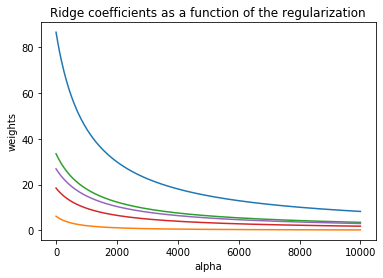

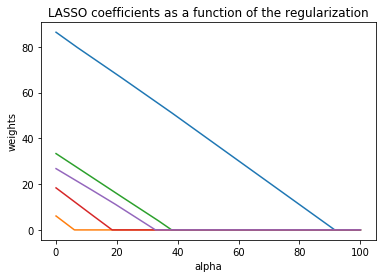

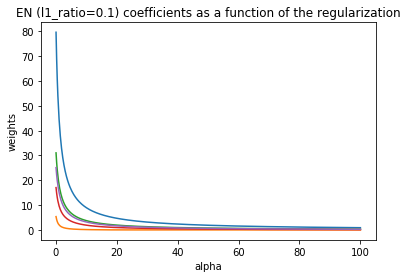

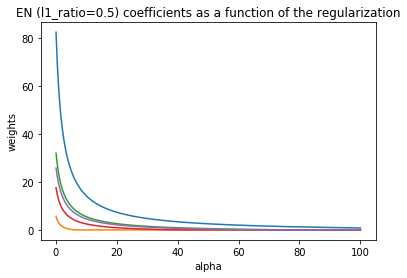

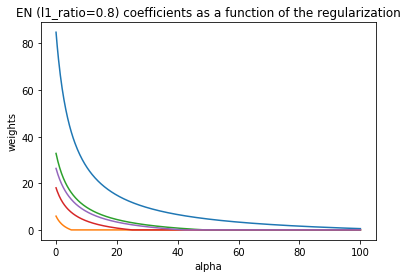

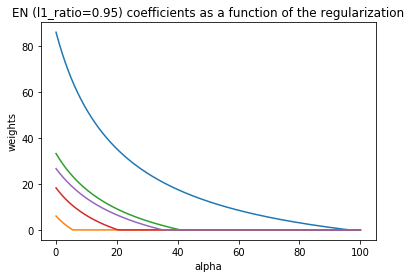

In [10]:
#your code here
# Plotting code
def plot_coef_variation(lambdas, betas, name='', logscale=False):
    plt.figure()
    plt.plot(lambdas,betas)
    if logscale:
        plt.xscale('log')
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title(name+' coefficients as a function of the regularization')
    plt.axis('tight')
    
plot_coef_variation(lambdas2,coefs_ridge, 'Ridge')
plot_coef_variation(lambdas1,coefs_lasso, 'LASSO')
for r in l1_ratios:
    plot_coef_variation(lambdas1,coefs_EN[r], 'EN (l1_ratio='+str(r)+')')

**2.3** Comment on this evolution. Does this make sense with what we've seen so far?**

*your answer here* 

AS can be seen, the Ridge coefficients approach zero smoothly, while the LASSO coefficients tend to move towards zero in a sharper manner. They are already nullified at lower values of lambda. The EN is a mix between the two, as expected. The L1 ratio controls how much of L1 or L2 regularization we need, so the plots become more like LASSO when we increase it.

**2.4** We're now interested in visualizing the behavior of the Loss functions. First, generate a regression problem with 1000 samples and 2 features. Then, use the provided "loss_3d_interactive" function to observe how the loss surface changes as the regularization parameter changes. Test the function with Ridge_loss, LASSO_loss and EN_loss. Comment on what you observe.**

**Note: for this to work, you have to install plotly. Go to https://plot.ly/python/getting-started/ and follow the steps. You don't need to make an account as we'll use the offline mode.**

In [11]:
X,y,true_coef = make_regression(n_samples = 1000, n_features = 2, noise = 10, random_state=209, coef=True)

In [17]:
from ipywidgets import interactive, HBox, VBox
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

def OLS_loss(X, y, beta, lbda=0):
    y_hat = np.dot(X,beta)
    return np.sum((y_hat-y)**2,axis=0)

def Ridge_loss(X, y, beta, lbda):
    y_hat = np.dot(X,beta)
    return np.sum((y_hat-y)**2,axis=0) + lbda*np.sum(beta**2, axis=0)

def LASSO_loss(X, y, beta, lbda):
    y_hat = np.dot(X,beta)
    return (1 / (2 * len(X)))*np.sum((y_hat-y)**2,axis=0) + lbda*np.sum(np.abs(beta), axis=0)

def EN_loss(X, y, beta, lbda):
    ratio=0.1
    y_hat = np.dot(X,beta)
    return (1 / (2 * len(X)))*np.sum((y_hat-y)**2,axis=0) + lbda*(ratio*np.sum(beta**2, axis=0) + (1-ratio)*np.sum(np.abs(beta), axis=0))

def loss_3d_interactive(X, y, loss='Ridge'):
    '''Uses plotly to draw an interactive 3D representation of the loss function, 
    with a slider to control the regularization factor.
    
    Inputs:
    X: predictor matrix for the regression problem. Has to be of dim n x 2
    y: response vector 
    
    loss: string with the loss to plot. Options are 'Ridge', 'LASSO', 'EN'.
    '''
    
    if loss == 'Ridge':
        loss_function = Ridge_loss
        lbda_slider_min = 0
        lbda_slider_max = 10000
        lbda_step = 10
        clf = Ridge()
    elif loss == 'LASSO':
        loss_function = LASSO_loss
        lbda_slider_min = 1
        lbda_slider_max = 150
        lbda_step = 1
        clf = Lasso()
    elif loss == 'EN':
        loss_function = EN_loss
        lbda_slider_min = 1
        lbda_slider_max = 150
        lbda_step = 1
        clf = ElasticNet()
    else:
        raise ValueError("Loss string not recognized. Available options are: 'Ridge', 'LASSO', 'EN'.")
        
    
    # linspace for loss surface
    L=20
    lsp_b = np.linspace(-80,80,L)
    lsp_b_x, lsp_b_y = np.meshgrid(lsp_b,lsp_b)
    lsp_b_mat = np.column_stack((lsp_b_x.flatten(),lsp_b_y.flatten()))
    
    # Get all optimal betas for current lambda range
    precomp_coefs=[]
    for l in range(lbda_slider_min,lbda_slider_max+1,lbda_step):
        clf.set_params(alpha=l)
        clf.fit(X, y)
        precomp_coefs.append(clf.coef_)
                
    f = go.FigureWidget(
        data=[
            go.Surface(
                    x=lsp_b_x,
                    y=lsp_b_y,
                    z=loss_function(X,y.reshape(-1,1), lsp_b_mat.T, 0).reshape((L,L)),
                    colorscale='Viridis',
                    opacity=0.7,
                    contours=dict(z=dict(show=True,
                                         width=3,
                                         highlight=True,
                                         highlightcolor='orange',
                                         project=dict(z=True),
                                         usecolormap=True))
            ),
            
            go.Scatter3d(
                x=[p[0] for p in precomp_coefs],
                y=[p[1] for p in precomp_coefs],
                z=np.zeros(len(precomp_coefs)),
                marker=dict(
                    size=1,
                    color='darkorange',
                    line=dict(
                        color='darkorange',
                        width=1
                        ),
                    opacity=1
                    )
                ),
            go.Scatter3d(
                x=[0],
                y=[0],
                z=[0],
                
                marker=dict(
                    size=10,
                    color='orange',
                    opacity=1
                    ),
            )
        ],

        layout=go.Layout(scene=go.layout.Scene(
                    xaxis = dict(
                        title='Beta 1'),
                    yaxis = dict(
                        title='Beta 2'),
                    zaxis = dict(
                        title='Loss'),
            camera=go.layout.scene.Camera(
                up=dict(x=0, y=0, z=1),
                center=dict(x=0, y=0, z=0),
                eye=dict(x=1.25, y=1.25, z=1.25))
        ),
            width=1000,
            height=700,)
    )

    def update_z(lbda):
        f.data[0].z = loss_function(X, y.reshape(-1,1), lsp_b_mat.T, lbda).reshape((L,L))
        beta_opt = precomp_coefs[(lbda-lbda_slider_min)//(lbda_step)]
        f.data[-1].x = [beta_opt[0]]
        f.data[-1].y = [beta_opt[1]]
        f.data[-1].z = [0]

    lambda_slider = interactive(update_z, lbda=(lbda_slider_min, lbda_slider_max, lbda_step))
    vb = VBox((f, lambda_slider))
    vb.layout.align_items = 'center'
    display(vb)
    

In [14]:
#youe code here
loss_3d_interactive(X, y, loss='Ridge')

    'data': [{'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
…

In [15]:
#youe code here
loss_3d_interactive(X, y, loss='LASSO')

    'data': [{'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
…

In [16]:
#youe code here
loss_3d_interactive(X, y, loss='EN')

    'data': [{'colorscale': [[0.0, '#440154'], [0.1111111111111111, '#482878'],
…